In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# Loading dataset
df = pd.read_csv("dataset.csv")

# Displaying first 5 rows
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 1005 non-null   object 
 1   model                      1005 non-null   object 
 2   price                      1005 non-null   int64  
 3   avg_rating                 904 non-null    float64
 4   5G_or_not                  1005 non-null   int64  
 5   processor_brand            985 non-null    object 
 6   num_cores                  999 non-null    float64
 7   processor_speed            963 non-null    float64
 8   battery_capacity           994 non-null    float64
 9   fast_charging_available    1005 non-null   int64  
 10  fast_charging              794 non-null    float64
 11  ram_capacity               1005 non-null   int64  
 12  internal_memory            1005 non-null   int64  
 13  screen_size                1005 non-null   float

In [100]:
df.describe()


,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,1005.000000,904.000000,1005.000000,999.000000,963.000000,994.000000,1005.000000,794.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1000.000000,1005.000000,1005.000000,1005.000000
mean,32071.162189,7.820022,0.552239,7.777778,2.426511,4822.331992,0.857711,45.599496,6.512438,140.330348,6.538338,92.200000,2.818905,50.311343,16.527000,0.639801,2219.548259,1075.955224
std,39138.857573,0.731439,0.497511,0.827064,0.458040,997.159689,0.349520,33.878699,2.730435,105.972570,0.344928,28.627029,0.767259,32.587548,10.760719,0.480297,510.930616,286.530275
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,48.000000,8.000000,0.000000,1650.000000,1080.000000
50%,19990.000000,7.900000,1.000000,8.000000,2.400000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,34999.000000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [101]:
# Create recommendation category using price
q1 = df['price'].quantile(0.33)
q2 = df['price'].quantile(0.66)

def classify_price(price):
    if price <= q1:
        return "Budget"
    elif price <= q2:
        return "Mid-Range"
    else:
        return "Premium"

df['recommendation_category'] = df['price'].apply(classify_price)

df[['price', 'recommendation_category']].head()


,price,recommendation_category
0,38999,Premium
1,46999,Premium
2,109900,Premium
3,51999,Premium
4,55999,Premium


In [102]:
X = df.drop(columns=['recommendation_category'])
y = df['recommendation_category']


In [103]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

categorical_features, numerical_features


(Index(['brand_name', 'model', 'processor_brand', 'os'], dtype='object'),
 Index(['price', 'avg_rating', '5G_or_not', 'num_cores', 'processor_speed',
        'battery_capacity', 'fast_charging_available', 'fast_charging',
        'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
        'num_rear_cameras', 'primary_camera_rear', 'primary_camera_front',
        'extended_memory_available', 'resolution_height', 'resolution_width'],
       dtype='object'))

In [104]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [106]:
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9253731343283582
              precision    recall  f1-score   support

      Budget       0.94      0.94      0.94        67
   Mid-Range       0.89      0.88      0.89        66
     Premium       0.94      0.96      0.95        68

    accuracy                           0.93       201
   macro avg       0.92      0.92      0.92       201
weighted avg       0.93      0.93      0.93       201



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

      Budget       1.00      1.00      1.00        67
   Mid-Range       1.00      1.00      1.00        66
     Premium       1.00      1.00      1.00        68

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



In [108]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9651741293532339
              precision    recall  f1-score   support

      Budget       0.94      0.97      0.96        67
   Mid-Range       0.95      0.94      0.95        66
     Premium       1.00      0.99      0.99        68

    accuracy                           0.97       201
   macro avg       0.97      0.96      0.97       201
weighted avg       0.97      0.97      0.97       201



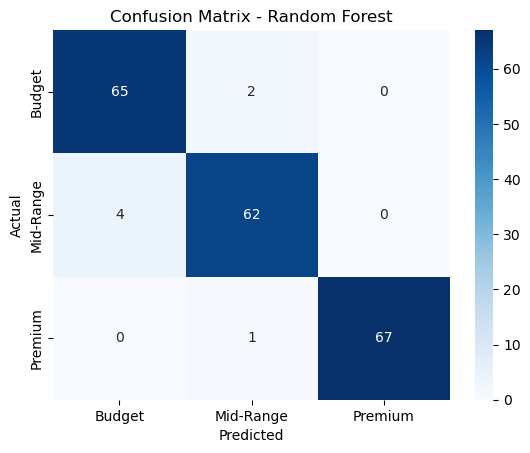

In [109]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [110]:
sample_phone = X_test.iloc[[0]]
prediction = rf_model.predict(sample_phone)

print("Recommended Category:", prediction[0])


Recommended Category: Budget


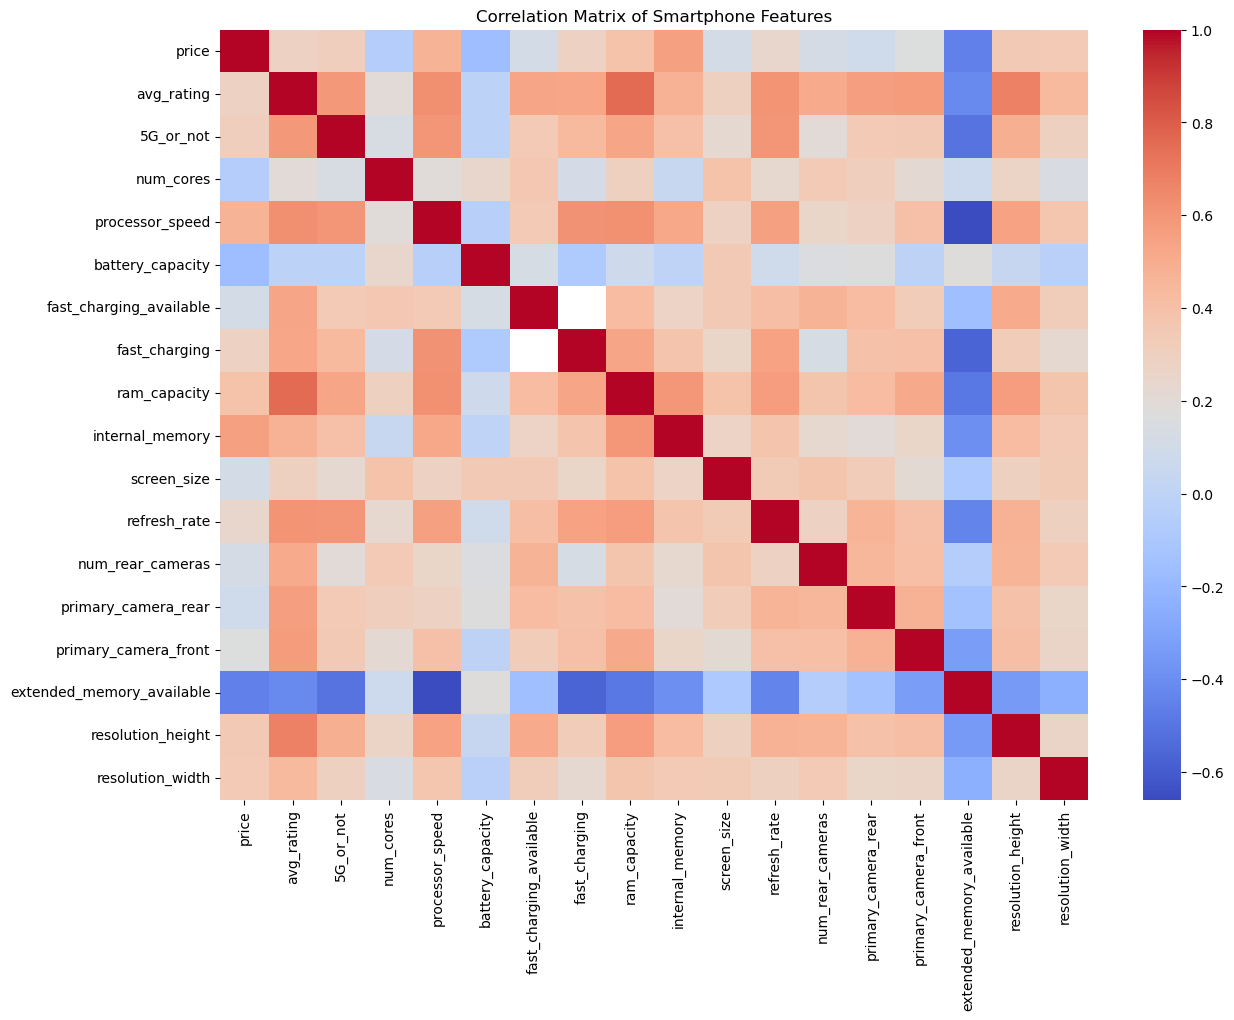

In [111]:
plt.figure(figsize=(14,10))

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Smartphone Features")
plt.show()


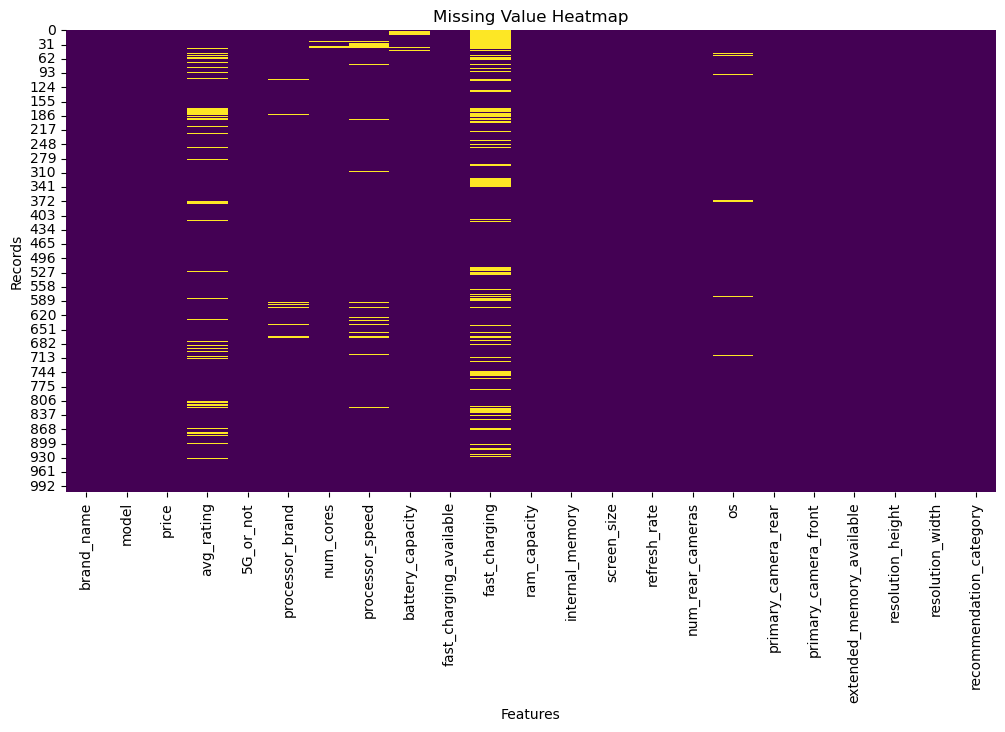

In [112]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.xlabel("Features")
plt.ylabel("Records")
plt.show()


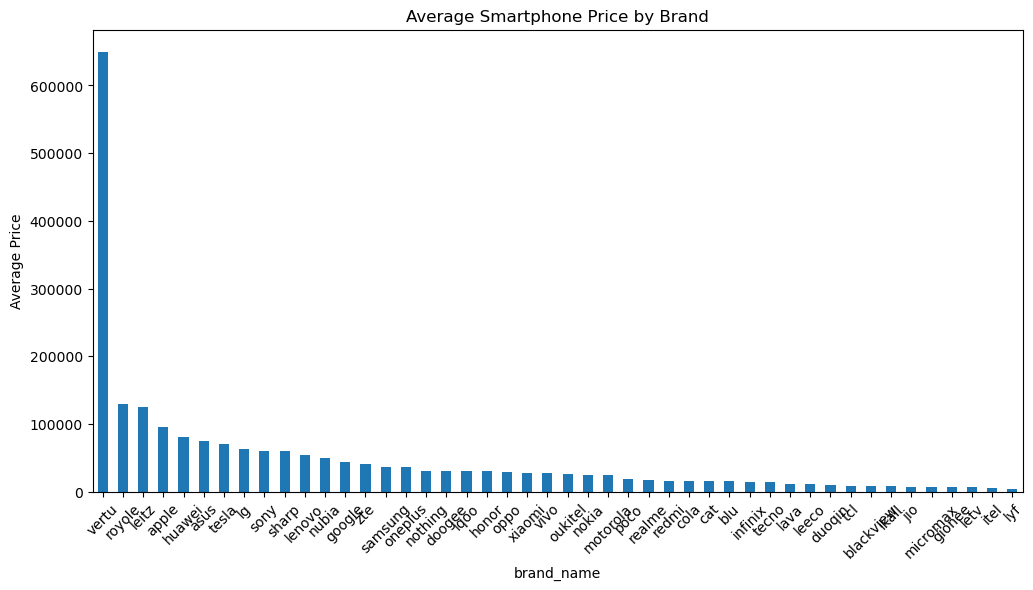

In [113]:
avg_price_brand = df.groupby("brand_name")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_price_brand.plot(kind="bar")
plt.ylabel("Average Price")
plt.title("Average Smartphone Price by Brand")
plt.xticks(rotation=45)
plt.show()


In [114]:
data_cleaned = df.dropna()

In [115]:
data = df.dropna(axis=1)
data.isnull().sum()

brand_name                   0
model                        0
price                        0
5G_or_not                    0
fast_charging_available      0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
primary_camera_rear          0
extended_memory_available    0
resolution_height            0
resolution_width             0
recommendation_category      0
dtype: int64

In [116]:
# Check total duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


In [117]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)


Original dataset shape: (1005, 23)
Cleaned dataset shape: (1005, 23)


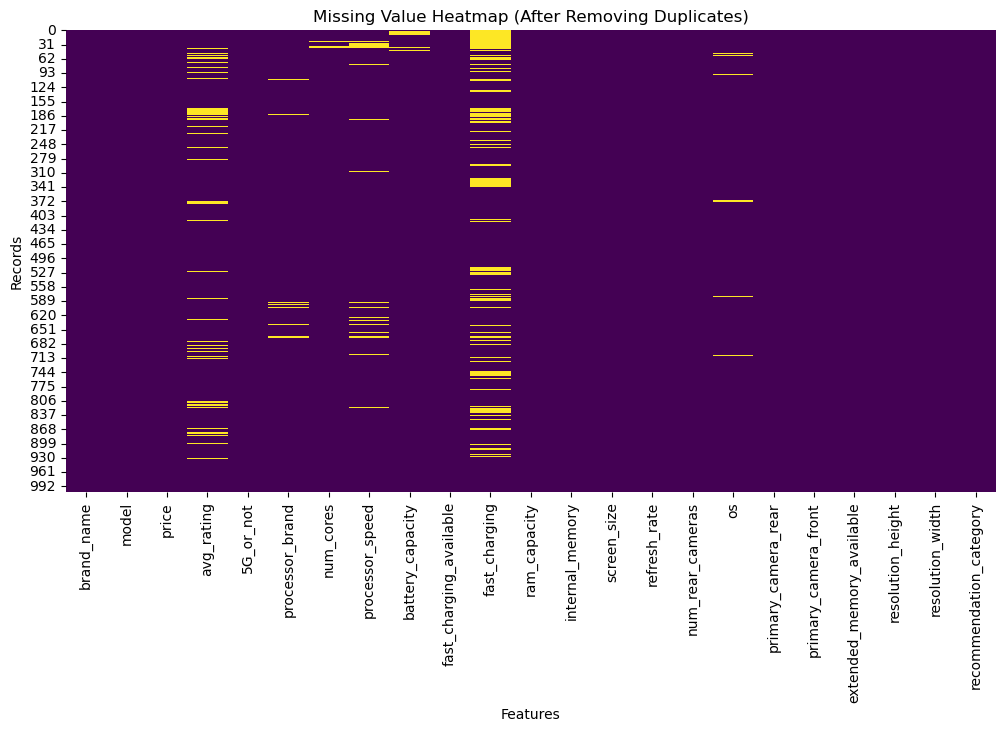

In [118]:
plt.figure(figsize=(12,6))
sns.heatmap(df_cleaned.isnull(), 
            cbar=False, 
            cmap="viridis")

plt.title("Missing Value Heatmap (After Removing Duplicates)")
plt.xlabel("Features")
plt.ylabel("Records")
plt.show()


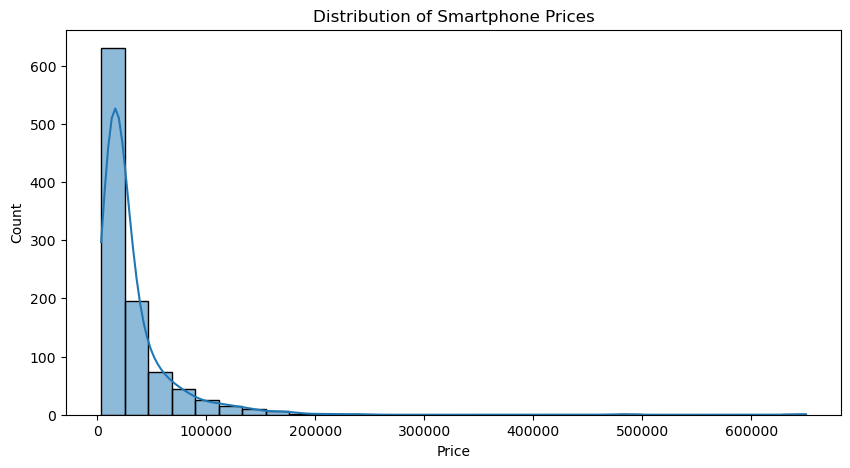

In [119]:
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['price'], bins=30, kde=True)
plt.title("Distribution of Smartphone Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


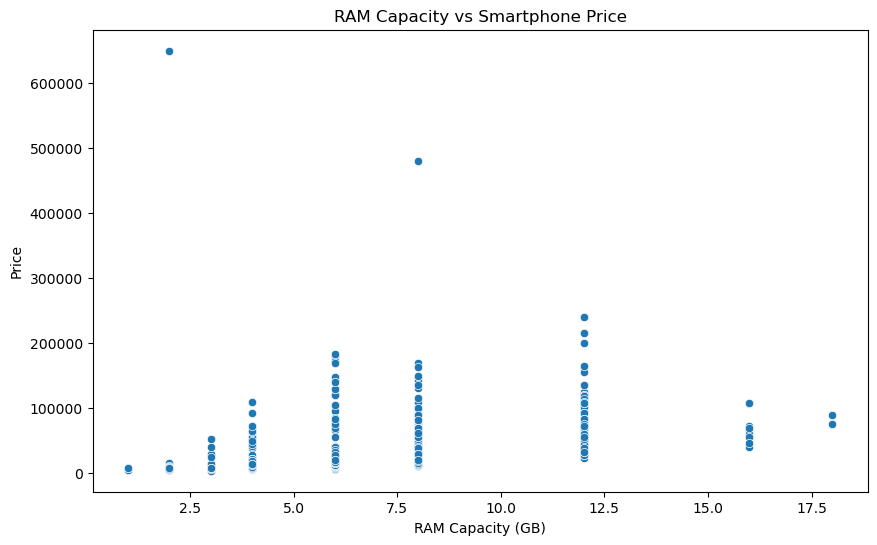

In [120]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cleaned['ram_capacity'], y=df_cleaned['price'])
plt.title("RAM Capacity vs Smartphone Price")
plt.xlabel("RAM Capacity (GB)")
plt.ylabel("Price")
plt.show()


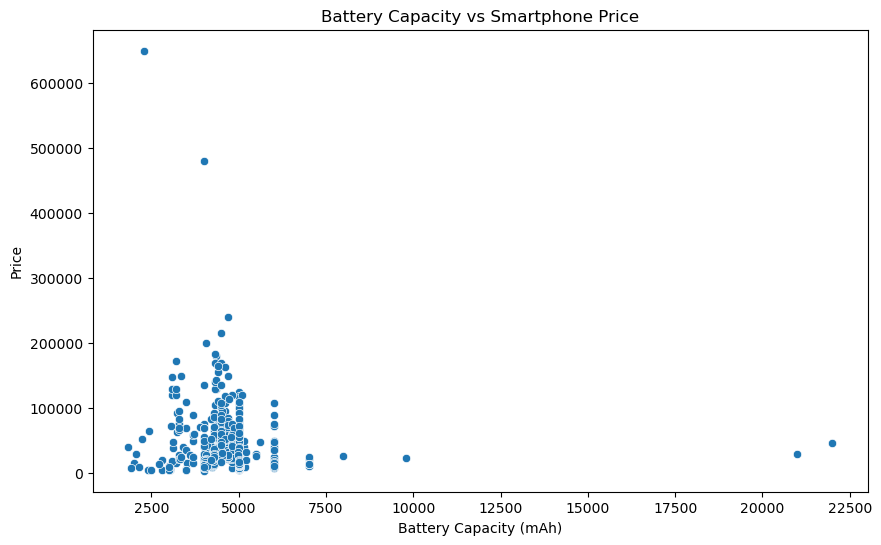

In [121]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cleaned['battery_capacity'], y=df_cleaned['price'])
plt.title("Battery Capacity vs Smartphone Price")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Price")
plt.show()


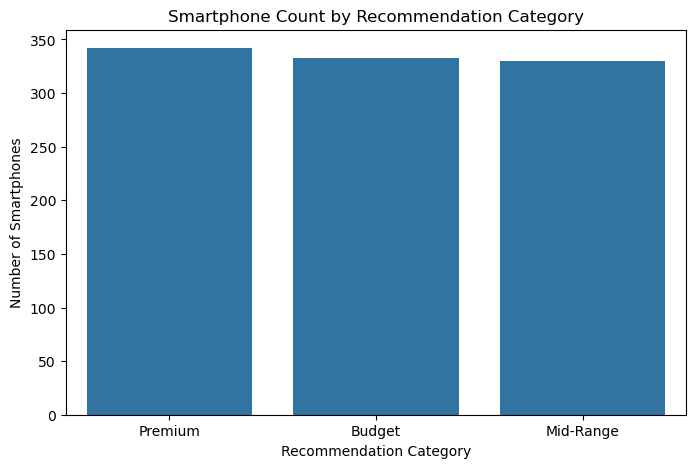

In [122]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_cleaned['recommendation_category'])
plt.title("Smartphone Count by Recommendation Category")
plt.xlabel("Recommendation Category")
plt.ylabel("Number of Smartphones")
plt.show()


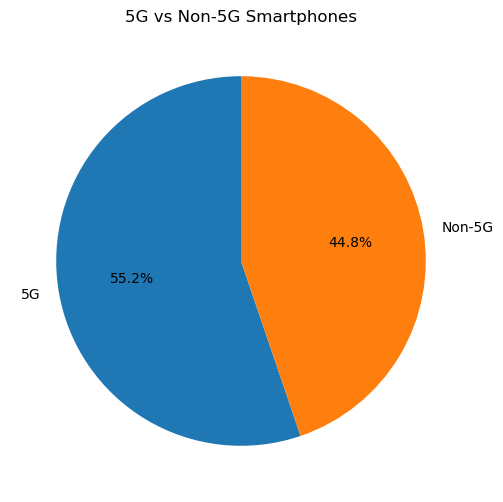

In [123]:
fiveg_counts = df_cleaned['5G_or_not'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(fiveg_counts,
        labels=['5G', 'Non-5G'],
        autopct='%1.1f%%',
        startangle=90)
plt.title("5G vs Non-5G Smartphones")
plt.show()


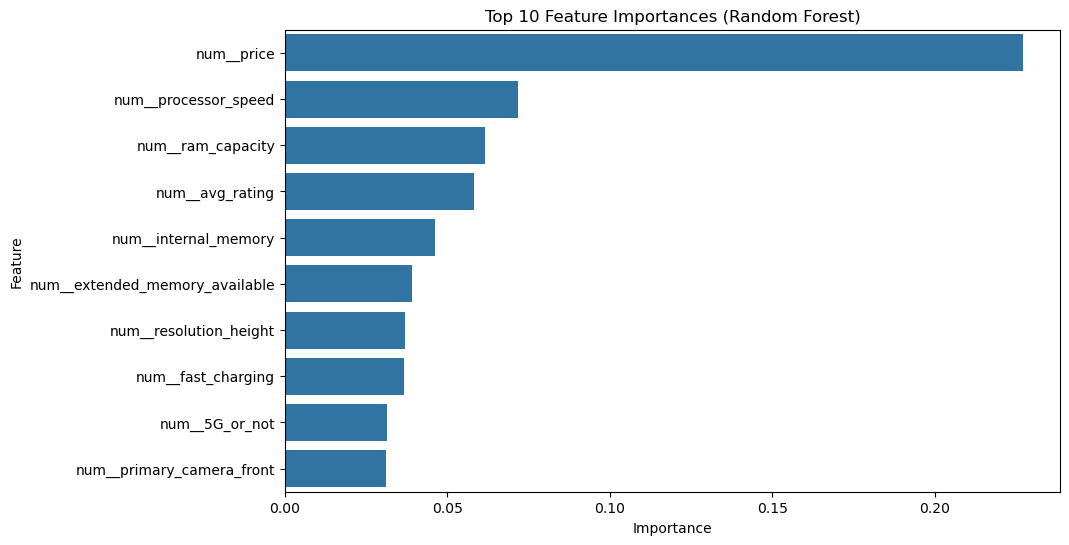

In [124]:
rf_classifier = rf_model.named_steps['classifier']
feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [125]:
# Predict recommendation category for all smartphones
df_cleaned['predicted_category'] = rf_model.predict(
    df_cleaned.drop(columns=['recommendation_category'])
)

df_cleaned[['brand_name', 'model', 'price', 'avg_rating', 'predicted_category']].head()


,brand_name,model,price,avg_rating,predicted_category
0,apple,Apple iPhone 11,38999,7.3,Premium
1,apple,Apple iPhone 11 (128GB),46999,7.5,Premium
2,apple,Apple iPhone 11 Pro Max,109900,7.7,Premium
3,apple,Apple iPhone 12,51999,7.4,Premium
4,apple,Apple iPhone 12 (128GB),55999,7.5,Premium


In [126]:
recommended_category = "Premium"

filtered_df = df_cleaned[
    df_cleaned['predicted_category'] == recommended_category
]


In [127]:
top_10_smartphones = filtered_df.sort_values(
    by=['avg_rating', 'price'],
    ascending=[False, True]
).head(10)

top_10_smartphones[
    ['brand_name', 'model', 'price', 'avg_rating', 'ram_capacity', 'battery_capacity']
]


,brand_name,model,price,avg_rating,ram_capacity,battery_capacity
624,samsung,Samsung Galaxy A53 5G (8GB RAM + 128GB),33499,8.9,8,5000.0
207,motorola,Motorola Edge 30 Pro 5G,34999,8.9,8,4800.0
622,samsung,Samsung Galaxy A53 (8GB RAM + 256GB),36499,8.9,8,5000.0
136,infinix,Infinix Zero Ultra,36999,8.9,8,4500.0
251,motorola,Motorola Moto X40,39999,8.9,8,4600.0
880,xiaomi,Xiaomi 13 5G,46990,8.9,8,4500.0
539,realme,Realme GT 2 Pro 5G (12GB RAM + 256GB),46999,8.9,12,5000.0
538,realme,Realme GT 2 Pro 5G,49959,8.9,8,5000.0
254,motorola,Motorola ThinkPhone,49990,8.9,8,5000.0
733,tecno,Tecno Phantom X2 Pro,49999,8.9,12,5160.0


C:\Users\hp\AppData\Local\Temp\ipykernel_14032\1534466949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


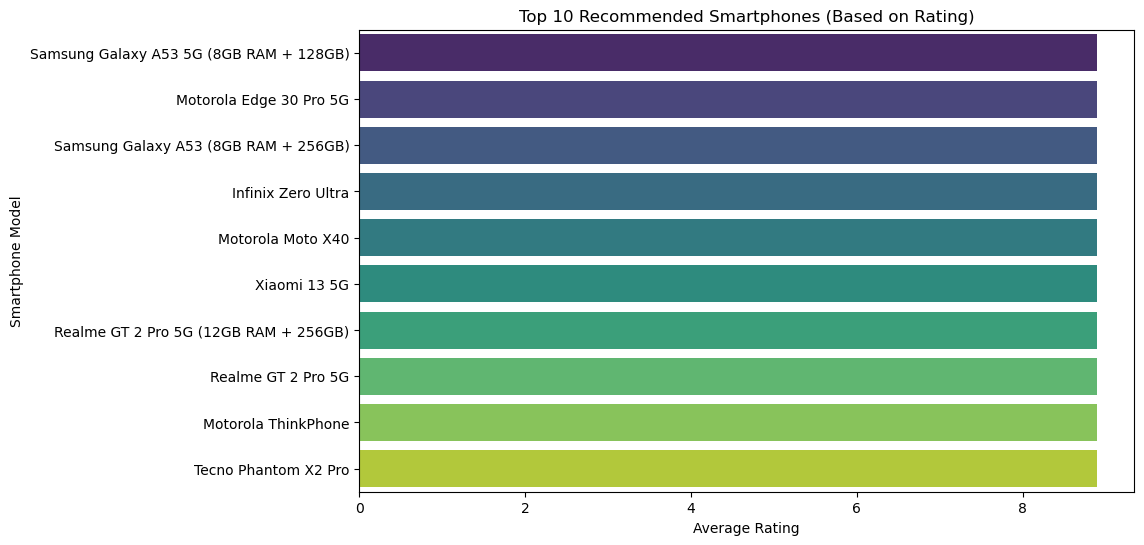

In [128]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='avg_rating',
    y='model',
    data=top_10_smartphones,
    palette='viridis'
)
plt.title("Top 10 Recommended Smartphones (Based on Rating)")
plt.xlabel("Average Rating")
plt.ylabel("Smartphone Model")
plt.show()
